Data description

In [1]:
from JoinDatasets import *
main_dir = "./data"
output_dir = "./merged-data"
join_data_sets(main_dir, output_dir)

Dataset content

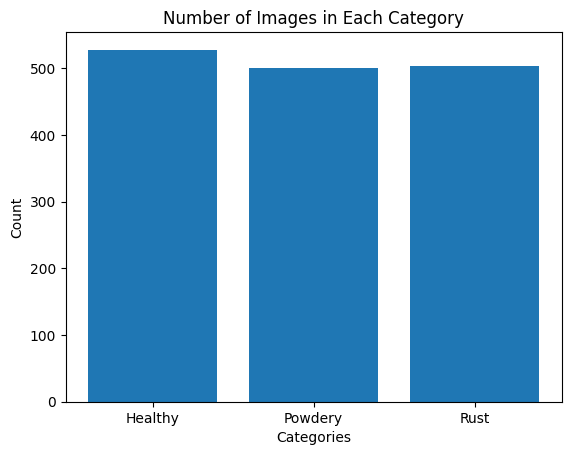

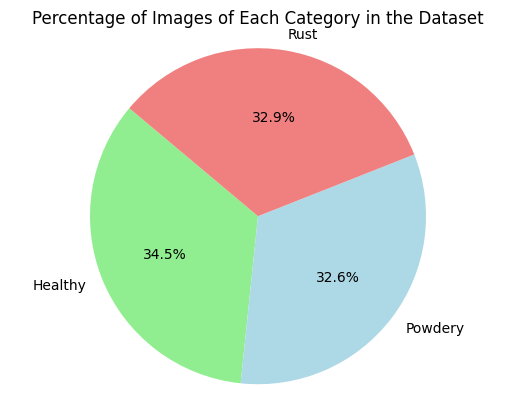

In [3]:
import os
import matplotlib.pyplot as plt

# Function to count the number of files in a directory
def count_files(directory):
    """
    Count files in the given directory.

    :param directory: directory to analyse
    :return: number of files in the given directory
    """
    count = 0
    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, filename)):
            count += 1
    return count

plots_saving_dir = "saved-plots/"

# Count images in each folder
healthy_count = count_files(output_dir + "/Healthy")
powdery_count = count_files(output_dir + "/Powdery")
rust_count = count_files(output_dir + "/Rust")

# Create a bar chart
labels = ['Healthy', 'Powdery', 'Rust']
counts = [healthy_count, powdery_count, rust_count]

plt.bar(labels, counts)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Number of Images in Each Category')
plt.savefig(plots_saving_dir+'Number_of_Images_in_Each_Category.png', bbox_inches='tight')
plt.show()

# Calculate total count
total_count = healthy_count + powdery_count + rust_count

# Calculate percentages
healthy_percentage = (healthy_count / total_count) * 100
powdery_percentage = (powdery_count / total_count) * 100
rust_percentage = (rust_count / total_count) * 100

# Create a pie chart
labels = ['Healthy', 'Powdery', 'Rust']
sizes = [healthy_percentage, powdery_percentage, rust_percentage]
colors = ['lightgreen', 'lightblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Percentage of Images of Each Category in the Dataset')
plt.savefig(plots_saving_dir+'Percentage_of_Images_of_Each_Category_in_the_Dataset.png', bbox_inches='tight')

plt.show()


Data relations

In [18]:
from rgbMean import *

healthy_dir = "merged-data\\Healthy"
powdery_dir = "merged-data\\Powdery"
rusty_dir = "merged-data\\Rust"
directories = [healthy_dir, powdery_dir, rusty_dir]
directories_rgb_count = []
rgbMean = RgbMean()
for directory in directories:
    fileNames = os.listdir(directory)
    filePaths = [directory + "\\" + fileName for fileName in fileNames]
    with multiprocessing.Pool(4) as pool:
        result = pool.map(rgbMean.get_single_image_rgb_mean, filePaths)
        rgb_counts = rgbMean.get_rgb_count(result)
        directories_rgb_count.append(rgb_counts)

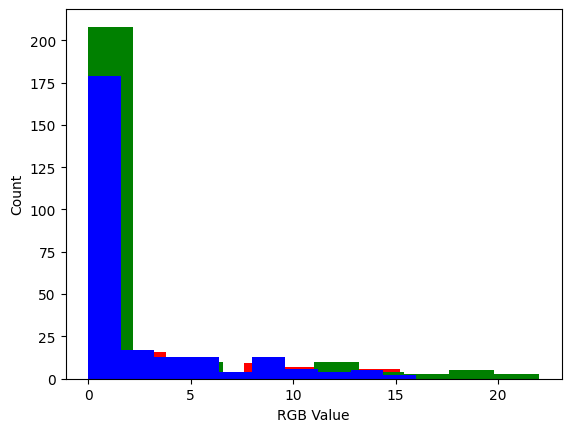

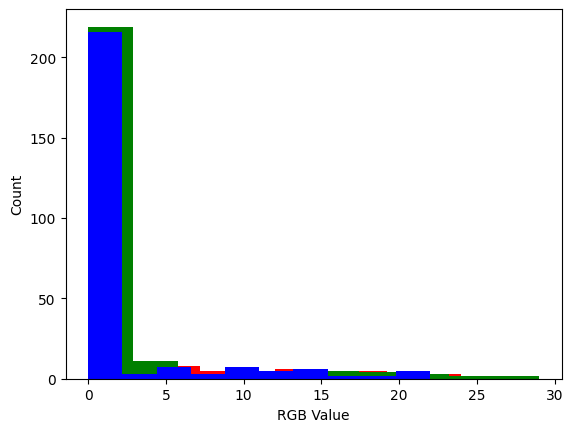

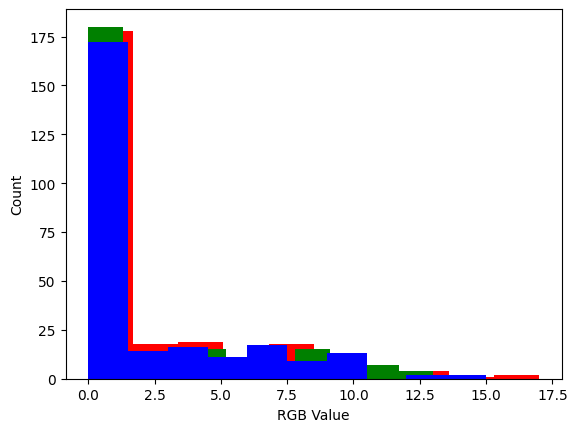

In [13]:
for directory_rgb_count in directories_rgb_count: 
    plt.xlabel('RGB Value')
    plt.ylabel('Count')
    plt.plot(directory_rgb_count[0], label = "R", color='r')
    plt.plot(directory_rgb_count[1], label = "G", color='g')
    plt.plot(directory_rgb_count[2], label = "B", color='b')
    plt.show()

Errors and noise

Data difficulty

Data representation

Data normalisation

In [18]:
from JoinDatasets import join_datasets_with_shape_normalisation
import os

path = os.getcwd()
join_datasets_with_shape_normalisation(os.path.join(path,"data"), os.path.join(path,"merged-data","unchanged"), "unchanged")
print("Finished copying")
join_datasets_with_shape_normalisation(os.path.join(path,"data"), os.path.join(path,"merged-data","cropped"), "crop", (2421,1728)) # 2592,1728
print("Finished cropping")
join_datasets_with_shape_normalisation(os.path.join(path,"data"), os.path.join(path,"merged-data","resized"), "resize", (3982,2700))
print("Finished resizing")

Finished copying


Data augmentation

Data splits